# Cluster update example on 2D lattice

In [56]:
import itertools
from math import exp
from cy_ising_cluster import simulate
%matplotlib notebook

### Create table of neighbours

In [17]:
size = 4
neighb = tabulate_neighbors((size, size, 1), 'sc')

### example of using the cluster update function

In [36]:
ene, mag2, mag4, _ = simulate(neighb, beta=0.5, num_sweeps=30000, num_therm=10000, verbose=1)

beta =  0.5   T =  2.0
Conformation size = 16

----- sweep =  0 beta =  0.5
  ene =  -2.0  (naive)
      =  -2.0 +/- 0.0
  mag^2 =  1.0 +/- 0.0
  mag^4 =  1.0 +/- 0.0

----- sweep =  10000 beta =  0.5
  ene =  -1.7471002899710029  (naive)
      =  -1.747789884868421 +/- 0.005664784607398188
  mag^2 =  0.8650384200246709 +/- 0.0032102315519780818
  mag^4 =  0.7987577036807411 +/- 0.004191593266552383

----- sweep =  20000 beta =  0.5
  ene =  -1.7557497125143742  (naive)
      =  -1.7557437294407896 +/- 0.003811043949296955
  mag^2 =  0.8693446109169408 +/- 0.002249701374871948
  mag^4 =  0.805037021636963 +/- 0.002979275828246698

Final:
  ene =  -1.7557416666666668  (naive)
  ene =  -1.7552403041294644 +/- 0.0032002412147683437
  mag^2 =  0.8690605163574219 +/- 0.001782283080024525
  mag^4 =  0.8047470450401306 +/- 0.002332898520466507


## Comparising to the exact enumeration of states

### enumerate all states of spins

In [38]:
site_basis = (-1, 1)
Nsite = size ** 2
states = [_ for _ in itertools.product(*[site_basis]*Nsite)]
states = [np.array(x) for x in states]

In [39]:
[x.reshape((size, size)) for x in states[0 : 5]] # 2D representation

[array([[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1]]),
 array([[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1,  1]]),
 array([[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1,  1, -1]]),
 array([[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1,  1,  1]]),
 array([[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [-1,  1, -1, -1]])]

### simple function that calculates energy of the states

In [40]:
def energy(spins, neighbors, J=1.0):
    """Ising model energy of a spin state.
    """
    ene = 0
    for site in range(Nsite):
        num_neighb = neighbors[site, 0]
        for site1 in neighbors[site, 1:num_neighb+1]:
            ene += -J * spins[site] * spins[site1]
    
    # each bond is counted twice, hence divide by two
    return ene / 2.0

# Average energy

def average_energy(states, neighbors, T):
    num, den = 0., 0.
    for state in states:
        ene = energy(state, neighbors, 1.0)
        weight = exp(-ene / T)
        num += ene * weight
        den += weight
    return num / den



### run both  functions on different temperatures
$\beta = 1 / T$

In [51]:
T = list(range(1, 6))
ene_exact = []
ene_cluster = []
for t in T:
    beta = 1.0 / t 
    ene_1 = average_energy(states, neighb, t) # takes few seconds to complite
    ene_1 /= Nsite
    ene_2, mag2_2, _, _ = simulate(neighb, beta, num_sweeps=10000)
    ene_exact.append(ene_1)
    ene_cluster.append(ene_2.mean)

<IPython.core.display.Javascript object>


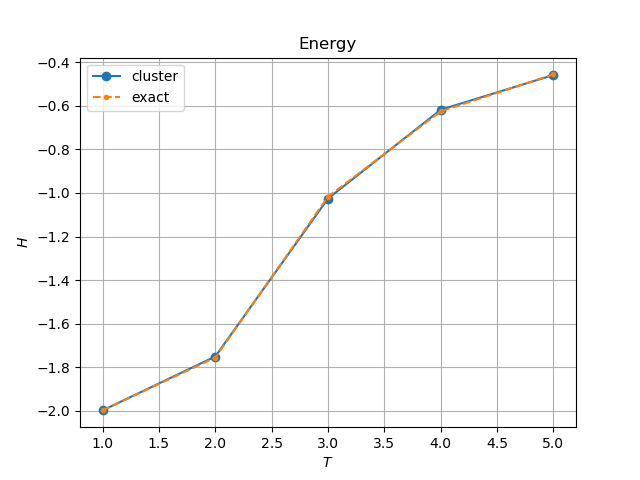

In [58]:
plt.figure()
plt.title('Energy')
plt.xlabel(r'$T$')
plt.ylabel(r'$H$')
plt.plot(T, ene_cluster, '-o', label='cluster')
plt.plot(T, ene_exact, '--.', label='exact')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [53]:
ene_cluster

[-1.997481496710526,
 -1.7503597861842106,
 -1.025621916118421,
 -0.6183182565789473,
 -0.45893297697368424]

In [54]:
ene_exact

[-1.9971584402578877,
 -1.7553802887768237,
 -1.0170696269556763,
 -0.6254861297089513,
 -0.45613536954308226]